In [1]:
import os
from tqdm import tqdm
import argparse
import numpy as np
from math import floor, ceil
from decord import VideoReader
from decord import cpu
from lipreading.models.components.avsr_resnet import VisualFrontend
import torch
from torch.utils.data import Dataset,DataLoader
import cv2
from torchvision import transforms as T
import lmdb


In [2]:
env = lmdb.open('../data/LRS2-preprocess/center_crop_feat_lmdb',readonly=True,lock=False,max_spare_txns=50,readahead=False)
datalist = np.load('../data/LRS2-preprocess/datalist.npz',allow_pickle=True)
pretrain_filelist = datalist['pretrain_datalist'].tolist()
txn = env.begin(buffers=True)

In [5]:
pretrain_filelist[0]

{'id': '5535415699068794046-00001',
 'sentence': "THESE DAYS WHEN YOU'RE COOKING CHIPS AT HOME THE TRADITIONAL CHIP PAN OFTEN STAYS ON THE SHELF IN FAVOUR OF A BAKING TRAY AND A BAG OF FROZEN OVEN",
 'words': [{'start': 1, 'end': 9, 'word': 'THESE'},
  {'start': 9, 'end': 17, 'word': 'DAYS'},
  {'start': 16, 'end': 22, 'word': 'WHEN'},
  {'start': 21, 'end': 24, 'word': "YOU'RE"},
  {'start': 24, 'end': 32, 'word': 'COOKING'},
  {'start': 31, 'end': 38, 'word': 'CHIPS'},
  {'start': 37, 'end': 40, 'word': 'AT'},
  {'start': 39, 'end': 49, 'word': 'HOME'},
  {'start': 54, 'end': 57, 'word': 'THE'},
  {'start': 56, 'end': 67, 'word': 'TRADITIONAL'},
  {'start': 66, 'end': 72, 'word': 'CHIP'},
  {'start': 71, 'end': 81, 'word': 'PAN'},
  {'start': 83, 'end': 92, 'word': 'OFTEN'},
  {'start': 91, 'end': 99, 'word': 'STAYS'},
  {'start': 98, 'end': 101, 'word': 'ON'},
  {'start': 100, 'end': 103, 'word': 'THE'},
  {'start': 102, 'end': 113, 'word': 'SHELF'},
  {'start': 116, 'end': 120, 'wo

In [3]:
if __name__ == "__main__":
    datalist_path = '../data/LRS2-preprocess/datalist.npz'
    data_prefix = '../data/LRS2/'
    visual_frontend_path = '../weights/visual_frontend.pt'
    lrs2_dataset = LRS2InferenceDataset(datalist_path,data_prefix,visual_frontend_path)
    for i in tqdm(lrs2_dataset):
        break
        

: 

: 

In [2]:
from lipreading.models.components.avsr_resnet import VisualFrontend
import torch
feature_extractor = VisualFrontend()
ckpt = torch.load('../weights/visual_frontend.pt',map_location='cuda')
feature_extractor = feature_extractor.to(torch.device('cuda'))
feature_extractor.load_state_dict(ckpt)

<All keys matched successfully>

In [2]:
datalist = np.load('../data/LRS2-preprocess/datalist.npz',allow_pickle=True)

In [19]:
class LRS2InferenceDataset(Dataset):
    def __init__(self,datalist_path,data_prefix):
        datalist = np.load(datalist_path,allow_pickle=True)
        self.data_prefix = data_prefix
        
        new_datalist = []
        new_datalist.extend(datalist['pretrain_datalist'].tolist())
        new_datalist.extend(datalist['preval_datalist'].tolist())
        new_datalist.extend(datalist['train_datalist'].tolist())
        new_datalist.extend(datalist['val_datalist'].tolist())
        new_datalist.extend(datalist['test_datalist'].tolist())
        self.datalist = new_datalist

In [3]:
new_datalist = []
new_datalist.extend(datalist['pretrain_datalist'].tolist())
new_datalist.extend(datalist['preval_datalist'].tolist())
new_datalist.extend(datalist['train_datalist'].tolist())
new_datalist.extend(datalist['val_datalist'].tolist())
new_datalist.extend(datalist['test_datalist'].tolist())

In [7]:
datalist['pretrain_datalist'].tolist()

[{'id': '5535415699068794046-00001',
  'sentence': "THESE DAYS WHEN YOU'RE COOKING CHIPS AT HOME THE TRADITIONAL CHIP PAN OFTEN STAYS ON THE SHELF IN FAVOUR OF A BAKING TRAY AND A BAG OF FROZEN OVEN",
  'words': [{'start': 1, 'end': 9, 'word': 'THESE'},
   {'start': 9, 'end': 17, 'word': 'DAYS'},
   {'start': 16, 'end': 22, 'word': 'WHEN'},
   {'start': 21, 'end': 24, 'word': "YOU'RE"},
   {'start': 24, 'end': 32, 'word': 'COOKING'},
   {'start': 31, 'end': 38, 'word': 'CHIPS'},
   {'start': 37, 'end': 40, 'word': 'AT'},
   {'start': 39, 'end': 49, 'word': 'HOME'},
   {'start': 54, 'end': 57, 'word': 'THE'},
   {'start': 56, 'end': 67, 'word': 'TRADITIONAL'},
   {'start': 66, 'end': 72, 'word': 'CHIP'},
   {'start': 71, 'end': 81, 'word': 'PAN'},
   {'start': 83, 'end': 92, 'word': 'OFTEN'},
   {'start': 91, 'end': 99, 'word': 'STAYS'},
   {'start': 98, 'end': 101, 'word': 'ON'},
   {'start': 100, 'end': 103, 'word': 'THE'},
   {'start': 102, 'end': 113, 'word': 'SHELF'},
   {'start': 

In [4]:
index = 10
data_prefix = '../data/LRS2/'
item = new_datalist[index]
vidname = os.path.join(data_prefix,item['path']+'.mp4')
video = []
captureObj = cv2.VideoCapture(vidname)
while (captureObj.isOpened()):
    ret, frame = captureObj.read()
    if ret == True:
        video.append(frame)
    else:
        break
captureObj.release()
video  = torch.from_numpy(np.stack(video))
# video = video.permute(0,3,1,2)

In [5]:
video.shape

torch.Size([92, 160, 160, 3])

In [12]:
torch.from_numpy(video.asnumpy())

tensor([[[[ 66,  50,  37],
          [ 65,  49,  36],
          [ 64,  48,  35],
          ...,
          [ 51,  27,  21],
          [ 54,  29,  26],
          [ 48,  23,  20]],

         [[ 65,  49,  36],
          [ 64,  48,  35],
          [ 63,  47,  34],
          ...,
          [ 47,  23,  17],
          [ 47,  22,  19],
          [ 46,  21,  18]],

         [[ 64,  48,  35],
          [ 63,  47,  34],
          [ 62,  46,  33],
          ...,
          [ 44,  23,  19],
          [ 41,  20,  18],
          [ 45,  24,  22]],

         ...,

         [[182, 192, 159],
          [120, 130,  97],
          [118, 121,  97],
          ...,
          [148, 116, 102],
          [140, 108, 105],
          [139, 107, 104]],

         [[176, 186, 153],
          [112, 122,  89],
          [130, 133, 111],
          ...,
          [133, 114, 100],
          [124, 106, 105],
          [124, 106, 105]],

         [[178, 188, 155],
          [107, 117,  84],
          [133, 136, 114],
         

In [6]:
trans =  T.Compose([
    T.Resize(224),
    T.Grayscale(),
    T.CenterCrop(112),
    T.ConvertImageDtype(torch.float32),
    T.Normalize(0.4161,0.1688)
])

In [7]:
video = trans(video).transpose(0,1).unsqueeze(0)


In [8]:
feature_extractor = VisualFrontend()
ckpt = torch.load('../weights/visual_frontend.pt',map_location='cpu')
feature_extractor.load_state_dict(ckpt)
feature_extractor = feature_extractor.eval()

In [12]:
feat = feature_extractor(video)

In [16]:
feat.squeeze(1)

torch.Size([92, 512])

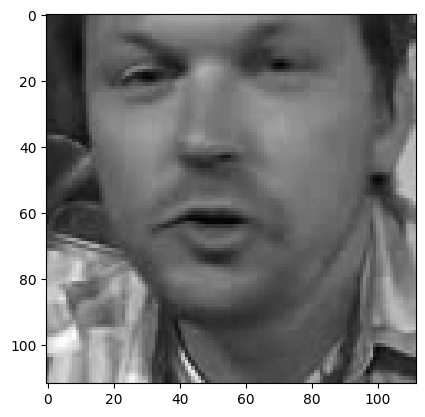

In [28]:
plt.imshow(output[0].permute(1,2,0),cmap='gray')

In [3]:
pretrain_datalist = datalist['pretrain_datalist']
data_prefix = '../data/LRS2/'
input_size = (640,640)
model_ratio = float(input_size[1]) / input_size[0]
batch_size = 64


In [4]:
detector = FaceDetector('../weights/scrfd_10g_gnkps.onnx','CUDA')

In [6]:
pretrain_datalist

NameError: name 'pretrain_datalist' is not defined

In [5]:
for item in tqdm(pretrain_datalist):
    vidname = os.path.join(data_prefix,item['path']+'.mp4')
    with open(vidname, 'rb') as f:
        vr = VideoReader(f, ctx=cpu())
        raw_video = vr.get_batch(range(0, len(vr))).asnumpy()
    img_shape = raw_video[0].shape
    im_ratio = float(img_shape[0]) / img_shape[1]
    
    if im_ratio > model_ratio:
        new_height = input_size[1]
        new_width = int(new_height / im_ratio)
    else:
        new_width = input_size[0]
        new_height = int(new_width * im_ratio)
    det_scale = float(new_height) / img_shape[0]
    
    video = np.stack([cv2.resize(frame, (new_width, new_height)) for frame in raw_video])
    pad_video = np.zeros((video.shape[0],input_size[1], input_size[0], 3), dtype=np.uint8)
    pad_video[:,:new_height, :new_width] = video
    
    blob = cv2.dnn.blobFromImages(pad_video, 1.0/128, input_size, (127.5, 127.5, 127.5), swapRB=False)
    bboxes,kpss = [],[]
    for i in range(0, blob.shape[0], batch_size):
        batch = blob[i:i+batch_size]
        bbox,kps = detector.detect(batch,0.05)
        bboxes.extend(bbox)
        kpss.extend(kps)
    
    bboxes = [(i/det_scale) for i in bboxes]
    kpss = [(i/det_scale) for i in kpss]
    # .astype(np.float16)
    
    
    break

  0%|          | 0/95354 [00:10<?, ?it/s]


In [6]:
for frame,box,kp in zip(raw_video,bboxes,kpss):
    # bgr_frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
    # for b in box:
    #     cv2.rectangle(bgr_frame,(int(b[0]),int(b[1])),(int(b[2]),int(b[3])),(0,255,0),2)

    
    # frame = cv2.cvtColor(bgr_frame,cv2.COLOR_BGR2RGB)
    # plt.imshow(frame)
    # plt.show()
    break

In [7]:
patch = norm_crop_batched(frame,kp)

In [9]:
patch[0].shape

(112, 112, 3)

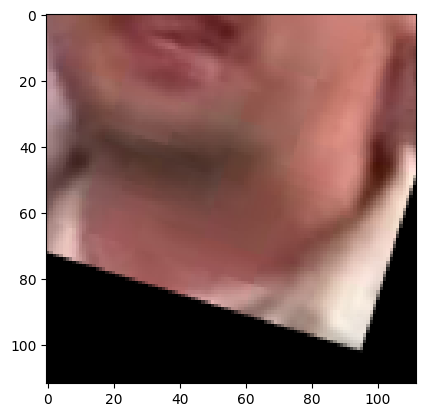

In [14]:
plt.imshow(patch[1])